**Building a Recurrent Neural Network to predict Google's stock price**  

Predict Google's stock price in January 2017 based on the stock prices of 2012 to 2016. Visualise the results and check if they are similar to the results in actual data.

**Part 1 - Data Preprocessing**

In [1]:
# Import required packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import os
os.chdir("C:\\Users\\Shrivatav\\Desktop\\Deep Learning A-Z\\Deep_Learning_A_Z\\Volume 1 - Supervised Deep Learning\\Part 3 - Recurrent Neural Networks (RNN)\\Section 12 - Building a RNN\\Recurrent_Neural_Networks")

In [3]:
# Training data
data_train = pd.read_csv("Google_Stock_Price_Train.csv")

In [4]:
# Subset to select input data for RNN
# Select only 'Open' column and convert to array since RNNs take arrays as inputs
training_set = data_train.iloc[:, 1:2].values

In [5]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [6]:
# Feature scaling - scale values to [0,1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
training_set_scaled = scaler.fit_transform(training_set)

In [7]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [8]:
# Create data with 60 timesteps and 1 output
# 60 day timestep - LSTM looks at previous 60 days data to decide next output for 1 day
# Example, for 1st iteration, it'll use values from index 0 to 59 to learn output for index 60
X_train = []
y_train = []

for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
# Convert to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [10]:
# First row of X_train contains stock prices from day 0 to day 59
# Second row of X_train contains stock prices from day 1 to day 60 .... and so on

In [11]:
# First row of y_train contains stock price of day 60
# Second row of y_train contains stock price of day 61 .... and so on

In [12]:
# Reshaping the data
# Reshape according to layer formatting for Recurrent Networks according
# to Keras documentation
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [13]:
X_train.shape

(1198, 60, 1)

Axis = 0 indicates the number of samples we have. The 1198 rows.  
Axis = 1 indicates the number of timesteps in each row/sample. Length of axis = 1 would be 60.  
Axis = 2 indicates the number of features in each timestep. In this example, we use 1 feature per timestep (the 'Open' price)

**Part 2 - Building the RNN**

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

C:\Users\Shrivatav\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [15]:
# Inititalise the RNN
regressor = Sequential()

In [16]:
# Add first LSTM layer and Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [17]:
# Add second LSTM layer and Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [18]:
# Add third LSTM layer and Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [19]:
# Add fourth LSTM layer and Dropout regularization
regressor.add(LSTM(units = 50)) # return_sequences = False since it is the last hidden layer
regressor.add(Dropout(0.2))

In [20]:
# Add output layer
# Fully connected layer with one output neuron
regressor.add(Dense(units = 1))

In [21]:
# Compile the RNN
# Can use RMSProp as optimizer as well
regressor.compile(optimizer = "adam", loss = "mean_squared_error")

In [22]:
# Fit RNN to training data
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0716
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0069
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0050
Epoch 4/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0060
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0043
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0043
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0043
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0042
Epoch 9/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0042
Epoch 10/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0047
Epoch 11/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0041
Epoch 12/100
1198/1198 [==============================] - 5s 4ms/step - 

1198/1198 [==============================] - 5s 4ms/step - loss: 0.0014
Epoch 98/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0016
Epoch 99/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0016
Epoch 100/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0015


**Part 3 - Making predictions and visualizing results**

In [38]:
# Test data - Real stock prices for January 2017
data_test = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_prices = data_test.iloc[:, 1:2].values

In [39]:
real_stock_prices

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [40]:
# Predict stock prices for January 2017
# Our model is trained to predict stock price of day t+1 based on previous 60 days stock prices
# Concatenate data_train and data_test so that we get data for days of January

# Concatenation done vertically on "Open" column
data_merged = pd.concat((data_train["Open"], data_test["Open"]), axis = 0)
# Required range - from 60 days before 3rd January to last record in data_total 
inputs = data_merged[len(data_merged) - len(data_test) - 60:].values
inputs = inputs.reshape(-1,1) # Reshape to avoid NumPy error/warning
inputs = scaler.transform(inputs) # Use transform() instead of fit_transform()

In [41]:
# Create data with 60 timesteps and 1 output
# 60 day timestep - LSTM looks at previous 60 days data to decide next output for 1 day
X_test = []

for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
    
# Convert to numpy arrays
X_test = np.array(X_test)

In [42]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [43]:
predicted_stock_prices = regressor.predict(X_test)

In [44]:
# Inverse scaling
predicted_stock_prices = scaler.inverse_transform(predicted_stock_prices)

In [45]:
predicted_stock_prices

array([[777.9669 ],
       [774.903  ],
       [776.1021 ],
       [778.3017 ],
       [782.40045],
       [789.2216 ],
       [794.6717 ],
       [795.7533 ],
       [795.1333 ],
       [794.6549 ],
       [794.6516 ],
       [794.67053],
       [794.66626],
       [795.46204],
       [796.60034],
       [802.3958 ],
       [810.4645 ],
       [818.2787 ],
       [821.15894],
       [813.85706]], dtype=float32)

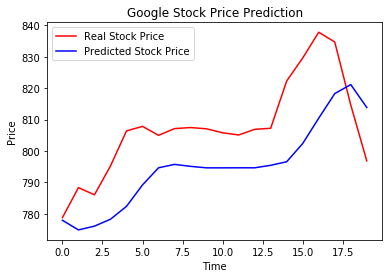

In [47]:
# Visuale the results
%matplotlib inline
plt.plot(real_stock_prices, color = "red", label = "Real Stock Price")
plt.plot(predicted_stock_prices, color = "blue", label = "Predicted Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

We see that out model follows the smooth curves well, but does not do well when there are spikes.

Ways of improving the model:
- More training data
- More number of timesteps (>60)
- More LSTM layers
- More units in each LSTM layer